## Hiding Function+ Import Statements + PATH definition

In [397]:
from IPython.display import HTML
import random

def hide_function(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'HIDE FUNCTION-Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

def import_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Imports-Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_function()

In [398]:
import nltk # please download wordnet and stopwords if not already downloaded 

import pandas as pd
import numpy as np

from nltk.corpus import wordnet
from nltk.corpus import stopwords

from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.decomposition import NMF
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from matplotlib import pyplot as plt 
from pylab import xticks
import numpy as np
import matplotlib.ticker as ticker

PATH='/Users/ssaeed/Documents/alice_scoring/'

hide_toggle()

# Data Preprocessing for Negative-Positive Set-Segregation

In [399]:
import pandas as pd

pos=pd.read_csv('/Users/ssaeed/Documents/alice_scoring/alice_positive.csv',index_col=0)

post_alice_litigated=pd.read_csv('/Users/ssaeed/Documents/alice_scoring/all_post_alice_litigated.csv',index_col=0)

df=pd.merge(post_alice_litigated,alice_positive, on=['pat_id'], how="outer", indicator=True)

df=df[df['_merge'] =='left_only']

neg=pd.DataFrame()
neg['pat_id']=df.index
neg['Ineligibility']=0

#to_csv('/Users/ssaeed/Documents/alice_scoring/alice_negative.csv',index=False)


neg.set_index('pat_id',inplace=True)

In [400]:
all_alice_patids=pd.concat([pos,neg])

all_claims_no_direction=pd.read_csv('/Users/ssaeed/Documents/alice_scoring/all_claims_no_direction.csv',index_col=1)

all_claims_with_direction=pd.merge(all_claims_no_direction,all_alice_patids,on=['pat_id'])

all_claims_with_direction.drop(['pat_id'],axis=1,inplace=True)

all_claims_with_direction.to_csv(PATH+'all_claims_with_direction.csv',index=False)

## Regex for Cleaning

In [401]:
# #Using regex to clean the incoming corpus 

df=all_claims_with_direction


# df=pd.read_csv('/Users/ssaeed/Documents/all_claims_edited_0204.csv',encoding='latin1')


import re

def split_it(line):
    
    line2=re.sub('\b\w{1,3}\b|<.*?>|((\d+)[\.])|\((.+?)\)|[0-9]+',"",str(line))
    
    return line2

df['claim_text']=df['claim_text'].apply(split_it)

df.drop_duplicates(subset=None, keep='first', inplace=False)

df.describe

df.to_csv(PATH+'all_claims_with_direction_cleaned.csv',index=False)

hide_toggle()

## Read in Dataset

In [415]:
a=pd.read_csv(PATH+'all_claims_with_direction_cleaned.csv')

print(len(a))

a=a.dropna()

print(len(a))

nltk.download('stopwords')
nltk.download('wordnet')

claim=a['claim_text']
label=a['Ineligibility']

print(sum(label))
print(len(label))

hide_toggle()

57380
57378
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ssaeed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ssaeed/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
724
57378


## Stemming and Lemmatization 

In [403]:
#Stemming and Lemmatization

stemmer = SnowballStemmer("english", ignore_stopwords=True)
lemmer=LancasterStemmer()
lemma=WordNetLemmatizer()


class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: ([lemma.lemmatize(w) for w in analyzer(doc)]) 

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

SCV = StemmedCountVectorizer(ngram_range=(1,2),stop_words='english',max_df=0.2,min_df=2)

LCV=LemmaCountVectorizer(stop_words='english',ngram_range=(1,2),max_features=4000,max_df=0.2,min_df=3)

hide_toggle()

### SMOTE ADASYN (adaptive synthetic minority oversampling)

In [404]:
#DOWNSAMPLE 

LCV=LemmaCountVectorizer(stop_words='english',ngram_range=(1,2),max_features=5000,max_df=0.3,min_df=3)

transformer = Pipeline([('vectorizer', LCV), ('tfidf', TfidfTransformer(norm='l2',use_idf=True,smooth_idf=True))])

claim=transformer.fit_transform(claim)

In [405]:
%%time
# New module not used before 
from imblearn.over_sampling import SMOTE,ADASYN

sm = ADASYN(random_state=42)
claims, label = sm.fit_resample(claim, label)

print(sum(label))

56656
CPU times: user 24.2 s, sys: 1.01 s, total: 25.2 s
Wall time: 28.7 s


## Split Training/Test

In [406]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
claim_tr, claim_tst, label_tr, label_tst = train_test_split(claims, label, test_size = 0.2, random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(claim_tr.shape[0]))
print ("Testing set has {} samples.".format(claim_tst.shape[0]))

hide_toggle()

Training set has 90648 samples.
Testing set has 22662 samples.


## Running the Algorithm + Performance

In [407]:
text_ensemble_lemmatized = LogisticRegression(C=0.01,penalty='l2',class_weight={0:1,1:1})


# # create the ensemble model
from time import time

start=time()

text_ensemble_lemmatized.fit(claim_tr,label_tr)
predicted=text_ensemble_lemmatized.predict(claim_tst)
predicted3=text_ensemble_lemmatized.predict_proba(claim)[:,1]
predicted4=text_ensemble_lemmatized.predict_proba(claim_tst)[:,1]

from sklearn.metrics import f1_score,precision_score,recall_score

print("F1:",round(f1_score(label_tst,predicted,average='binary'),3))
print("Precision:",round(precision_score(label_tst,predicted,average='binary'),3))
print("Recall:",round(recall_score(label_tst,predicted,average='binary'),3))

# print(time()-start)
# print(sum(predicted3<0.1))

hide_toggle()

F1: 0.927
Precision: 0.881
Recall: 0.978


## Model Outputs

Percentiles: 

25th: 0.18
Median: 0.24
75th: 0.39
95th: 0.64


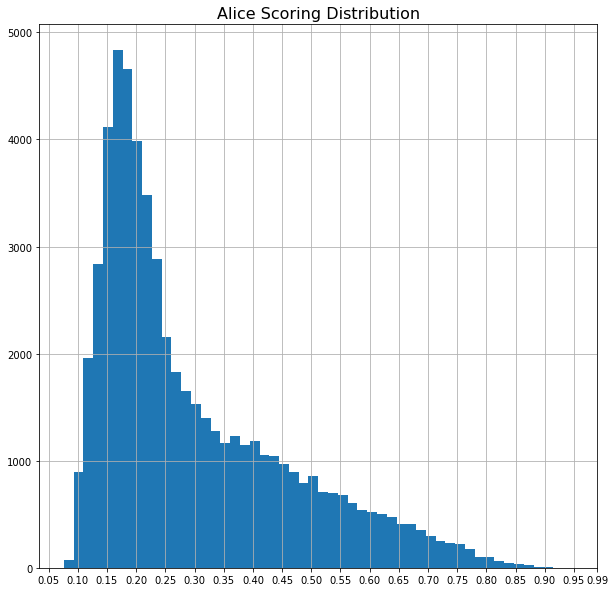

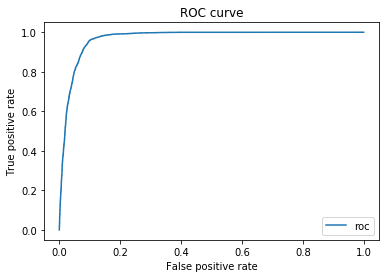

ROC SCORE= 0.969

(0.0, 0.05]     0.0%
(0.05, 0.1]     0.7%
(0.1, 0.15]    12.1%
(0.15, 0.2]    23.8%
(0.2, 0.25]    16.8%
(0.25, 0.3]     9.2%
(0.3, 0.35]     7.1%
(0.35, 0.4]     6.1%
(0.4, 0.45]     5.6%
(0.45, 0.5]     4.5%
(0.5, 0.55]     3.8%
(0.55, 0.6]     3.1%
(0.6, 0.65]     2.5%
(0.65, 0.7]     2.0%
(0.7, 0.75]     1.3%
(0.75, 0.8]     0.8%
(0.8, 0.85]     0.4%
(0.85, 0.9]     0.1%
(0.9, 0.95]     0.0%
(0.95, 1.0]     0.0%
dtype: object


In [411]:
predicted3=pd.Series(predicted3)

fig,ax=plt.subplots()
predicted3.hist(ax=ax,bins=50,figsize=(10,10))

plt.xticks([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,.45,0.5,0.55,0.6,0.65,.7,0.75,0.8,0.85,0.9,0.95,0.99])
plt.title('Alice Scoring Distribution', fontsize=16)

predicted3=pd.Series(predicted3)

art=predicted3.groupby(pd.cut(predicted3, np.linspace(0,1,21))).count()#/predicted3.count()

print("Percentiles: \n" )

print("25th: {}".format(round(predicted3.quantile(0.25),2)))
print("Median: {}".format(round(predicted3.quantile(0.50),2)))
print("75th: {}".format(round(predicted3.quantile(0.75),2)))
print("95th: {}".format(round(predicted3.quantile(0.95),2)))

#art.to_csv('abc.csv')

from sklearn.metrics import roc_curve,auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr,tpr,_=roc_curve(label_tst, predicted4)

from matplotlib import pyplot as plt 

plt.figure()
#plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label='roc')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

from sklearn.metrics import roc_auc_score

print("ROC SCORE=",round(roc_auc_score(label_tst,predicted4),3))

print()

art=predicted3.groupby(pd.cut(predicted3, np.linspace(0,1,21))).count()/predicted3.count()
print(art.map(lambda n: '{:,.1%}'.format(n)))


hide_toggle()

## Performance

Percentiles: 

25th: 0.23
Median: 0.58
75th: 0.72
95th: 0.82


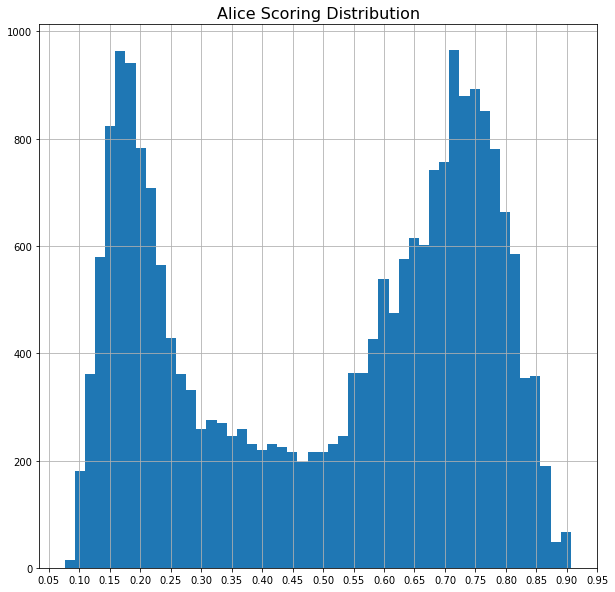

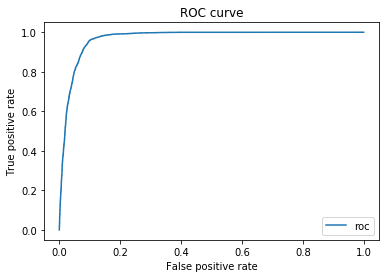

ROC SCORE= 0.969

(0.0, 0.05]     0.0%
(0.05, 0.1]     0.3%
(0.1, 0.15]     6.2%
(0.15, 0.2]    12.2%
(0.2, 0.25]     8.5%
(0.25, 0.3]     4.5%
(0.3, 0.35]     3.5%
(0.35, 0.4]     3.2%
(0.4, 0.45]     2.9%
(0.45, 0.5]     2.8%
(0.5, 0.55]     3.2%
(0.55, 0.6]     5.6%
(0.6, 0.65]     7.5%
(0.65, 0.7]     8.6%
(0.7, 0.75]    11.9%
(0.75, 0.8]    10.7%
(0.8, 0.85]     6.5%
(0.85, 0.9]     1.8%
(0.9, 0.95]     0.1%
(0.95, 1.0]     0.0%
dtype: object


In [414]:
predicted4=pd.Series(predicted4)


from matplotlib import pyplot as plt 
from pylab import xticks
import numpy as np
import matplotlib.ticker as ticker

fig,ax=plt.subplots()
predicted4.hist(ax=ax,bins=50,figsize=(10,10))

plt.xticks([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,.45,0.5,0.55,0.6,0.65,.7,0.75,0.8,0.85,0.9,0.95])
plt.title('Alice Scoring Distribution', fontsize=16)

predicted4=pd.Series(predicted4)

art=predicted4.groupby(pd.cut(predicted4, np.linspace(0,1,21))).count()#/predicted3.count()

print("Percentiles: \n" )

print("25th: {}".format(round(predicted4.quantile(0.25),2)))
print("Median: {}".format(round(predicted4.quantile(0.50),2)))
print("75th: {}".format(round(predicted4.quantile(0.75),2)))
print("95th: {}".format(round(predicted4.quantile(0.95),2)))

#art.to_csv('abc.csv')

from sklearn.metrics import roc_curve,auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr,tpr,_=roc_curve(label_tst, predicted4)

from matplotlib import pyplot as plt 

plt.figure()
#plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label='roc')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

from sklearn.metrics import roc_auc_score

print("ROC SCORE=",round(roc_auc_score(label_tst,predicted4),3))

print()

art=predicted4.groupby(pd.cut(predicted4, np.linspace(0,1,21))).count()/predicted4.count()
print(art.map(lambda n: '{:,.1%}'.format(n)))


hide_toggle()

## Results on USAA Portfolio

In [410]:
a=pd.read_csv('/Users/ssaeed/Documents/USAA.csv')

claim=a['claim_text']

claim_transform=transformer.transform(claim)

# TfidfTransformer(norm='l2',use_idf=True,smooth_idf=True).transform(claim)

predicted5=text_ensemble_lemmatized.predict_proba(claim_transform)[:,1]


e=[]

for i in range(len(predicted5)):
    
    e.append(round(predicted5[i],3))


a['alice_score_model227_smote'] =e

# cols=[7,8]
# a=a.drop(a.columns[cols],axis=1)

a.to_csv('/Users/ssaeed/Documents/USAA.csv')


